In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#f_star=0, only noise

kappa=[math.exp(-1),math.exp(-0.75),math.exp(-0.5),math.exp(-0.25),1,math.exp(0.25),math.exp(.5),math.exp(.75),math.exp(1)]
sigma1=0.1
m=1000 #test size
delta=0.01



def Error1(n,d):#with augmentation
    
    def K(x,y):
        return np.dot(x,y)+(np.dot(x,y))**2
    def f(kap):
        l=np.zeros(d)
        for i in range(d):
            l[i]=(1-((i)/d)**kap)**(1/kap)
        sigma=np.diag(l)
        mean=np.zeros(d)
        X=np.random.multivariate_normal(mean,sigma,size=n)
        xtrain=np.array(X)
        
        I=np.identity(d)
        p=np.random.multivariate_normal(mean,I,size=n)
        P=np.array(p)
        temp1=xtrain+delta*P
        
        temp1=np.concatenate((xtrain,temp1))
        
        p=np.random.multivariate_normal(mean,I,size=n)
        P=np.array(p)
        temp2=xtrain+delta*P
        
        temp2=np.concatenate((temp1,temp2))
        
        p=np.random.multivariate_normal(mean,I,size=n)
        P=np.array(p)
        temp3=xtrain+delta*P
        
        X_train=np.concatenate((temp2,temp3))
        
        
        
        
        theta=np.random.multivariate_normal(mean,I,size=100)  
        def f_star(x):
            k1=[K(x,y) for y in theta]
            return 0 #sum(k1)
        y=[f_star(x) for x in X]
        y=np.array(y)
        epsilon=np.random.normal(0,sigma1**2,size=n)
        temp=y+epsilon
        
        y_train=np.concatenate((temp,temp))
        Y_train=np.concatenate((y_train,y_train))
        
        
        X=np.random.multivariate_normal(mean,sigma,m)
        Xtest=np.array(X)

        
        y=[f_star(x) for x in X]
        y_test=np.array(y)
        epsilon=np.random.normal(0,sigma1**2,size=m)
        epsilon=np.array(epsilon)
        Ytest=y_test+epsilon
        N=n*4
        b=np.zeros((m,N))
        for i in range(m):
            for j in range(N):
                b[i][j]=K(Xtest[i],X_train[j])
        b=np.matrix(b) 
        I=np.identity(N)
        k=np.zeros((N,N))
        for i in range(N):
            for j in range(N):
                k[i][j]=K(X_train[i],X_train[j])

        k=np.matrix(k)
        k_inv=np.linalg.inv(k)
        y=Y_train
        temp1=np.matmul(b,k_inv)
        temp2=np.matmul(temp1,y)
        
        y_bar=np.average(Ytest)
        ybar=np.ones(m)*y_bar
        num=0
        den=0
        ypred=temp2
        num = np.linalg.norm(ypred - Ytest)**2
        den = np.linalg.norm(ybar-Ytest)**2
        error=num/den
        return math.log(error)
    B=np.zeros(len(kappa))    
    for i in range(len(kappa)):
        
        A=np.zeros(3)    
    
        for j in range(len(A)):
            A[j]=f(kappa[i])
        temp=np.average(A)
        B[i]=temp
    return B

In [2]:
def Error2(n,d):#without augmentation
    
    def K(x,y):
        return np.dot(x,y)+(np.dot(x,y))**2
    def f(kap):
        l=np.zeros(d)
        for i in range(d):
            l[i]=(1-((i)/d)**kap)**(1/kap)
        sigma=np.diag(l)
        mean=np.zeros(d)
        X=np.random.multivariate_normal(mean,sigma,size=n)
        X_train=np.array(X)
        I=np.identity(d)
        theta=np.random.multivariate_normal(mean,I,size=100)  
        def f_star(x):
            k1=[K(x,y) for y in theta]
            return 0#sum(k1)
        y=[f_star(x) for x in X]
        y=np.array(y)
        epsilon=np.random.normal(0,sigma1**2,size=n)
        Y_train=y+epsilon
        
        X=np.random.multivariate_normal(mean,sigma,m)
        Xtest=np.array(X)
        
        y=[f_star(x) for x in X]
        y_test=np.array(y)
        epsilon=np.random.normal(0,sigma1**2,size=m)
        epsilon=np.array(epsilon)
        Ytest=y_test+epsilon
        
        b=np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                b[i][j]=K(Xtest[i],X_train[j])
        b=np.matrix(b) 
        I=np.identity(n)
        k=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                k[i][j]=K(X_train[i],X_train[j])

        k=np.matrix(k)
        k_inv=np.linalg.inv(k)
        y=Y_train
        temp1=np.matmul(b,k_inv)
        temp2=np.matmul(temp1,y)
        
        y_bar=np.average(Ytest)
        ybar=np.ones(m)*y_bar
        num=0
        den=0
        ypred=temp2
        num = np.linalg.norm(ypred - y_test)**2
        den = np.linalg.norm(ybar-Ytest)**2
        error=num/den
        return math.log(error)
    B=np.zeros(len(kappa))    
    for i in range(len(kappa)):
        
        A=np.zeros(3)    
    
        for j in range(len(A)):
            A[j]=f(kappa[i])
        temp=np.average(A)
        B[i]=temp
    return B

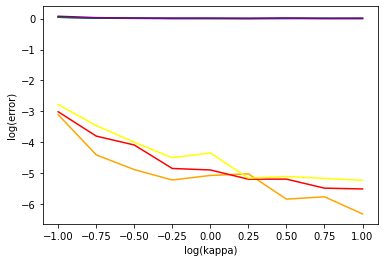

In [9]:
d=200
N=[40,60,80]
kappa2=[-1,-.75,-.5,-.25,0,.25,.5,.75,1]
errors=[]
for n in N:
    errors.append(Error1(n,d))#with augmentation
    errors.append(Error2(n,d))#without augmentation
plt.plot(kappa2,errors[0],color='blue')
plt.plot(kappa2,errors[1],color='orange')
plt.plot(kappa2,errors[2],color='green')
plt.plot(kappa2,errors[3],color='red')
plt.plot(kappa2,errors[4],color='purple')
plt.plot(kappa2,errors[5],color='yellow')
plt.xlabel('log(kappa)')
plt.ylabel('log(error)')
plt.show()  

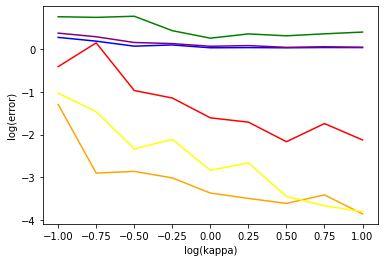

In [3]:
n=20
D=[50,20,40]
kappa2=[-1,-.75,-.5,-.25,0,.25,.5,.75,1]
errors=[]
for d in D:
    errors.append(Error1(n,d))#with augmentation
    errors.append(Error2(n,d))#without augmentation
plt.plot(kappa2,errors[0],color='blue')
plt.plot(kappa2,errors[1],color='orange')
plt.plot(kappa2,errors[2],color='green')
plt.plot(kappa2,errors[3],color='red')
plt.plot(kappa2,errors[4],color='purple')
plt.plot(kappa2,errors[5],color='yellow')
plt.xlabel('log(kappa)')
plt.ylabel('log(error)')
plt.show() 

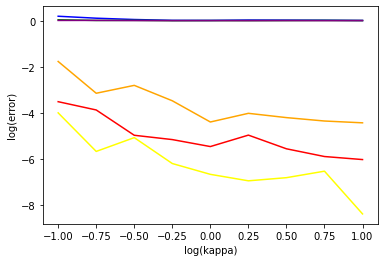

In [11]:
n=10
D=[50,100,200]
kappa2=[-1,-.75,-.5,-.25,0,.25,.5,.75,1]
errors=[]
for d in D:
    errors.append(Error1(n,d))#with augmentation
    errors.append(Error2(n,d))#without augmentation
plt.plot(kappa2,errors[0],color='blue')
plt.plot(kappa2,errors[1],color='orange')
plt.plot(kappa2,errors[2],color='green')
plt.plot(kappa2,errors[3],color='red')
plt.plot(kappa2,errors[4],color='purple')
plt.plot(kappa2,errors[5],color='yellow')
plt.xlabel('log(kappa)')
plt.ylabel('log(error)')
plt.show()